In [ ]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
import datetime# Xử lý ngày tháng

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
CTG = pd.read_csv('/content/drive/My Drive/BIGDATA//ctg.txt')
CTG.head()

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,CTG,20090716,40.0,45.0,40.0,40.1,2401900
1,CTG,20090717,38.6,39.0,38.1,38.1,1002480
2,CTG,20090720,36.2,36.2,36.2,36.2,156560
3,CTG,20090721,34.4,35.5,34.4,34.9,2133390
4,CTG,20090722,35.5,35.9,35.0,35.4,949090


In [ ]:
LPB = pd.read_csv('/content/drive/My Drive/Trainocate/ML_DS_102022/Practice/lpb.txt')
LPB.head()

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,LPB,20171005,14.8,15.8,13.5,14.2,7293500
1,LPB,20171006,14.2,14.2,13.6,13.8,1196846
2,LPB,20171009,13.8,14.0,13.7,13.9,1018740
3,LPB,20171010,13.9,14.0,13.6,13.7,1369264
4,LPB,20171011,13.8,13.8,12.9,13.1,1929895


In [ ]:
#tao list noi 2 bank
list_banks = ['CTG', 'LPB']

In [ ]:
#tao list noi 2 bank
list_banks = ['CTG', 'LPB']

In [ ]:
# Tham số axis = 1 là nối theo cột
bank_stocks = pd.concat([CTG,LPB],axis=1, keys = list_banks)

In [ ]:
bank_stocks

CTG                                                         LPB  \
     <Ticker> <DTYYYYMMDD> <Open> <High>  <Low> <Close> <Volume> <Ticker>   
0         CTG     20090716  40.00  45.00  40.00   40.10  2401900      LPB   
1         CTG     20090717  38.60  39.00  38.10   38.10  1002480      LPB   
2         CTG     20090720  36.20  36.20  36.20   36.20   156560      LPB   
3         CTG     20090721  34.40  35.50  34.40   34.90  2133390      LPB   
4         CTG     20090722  35.50  35.90  35.00   35.40   949090      LPB   
...       ...          ...    ...    ...    ...     ...      ...      ...   
3313      CTG     20221021  23.25  23.25  21.65   21.65  6658600      NaN   
3314      CTG     20221024  21.70  22.00  20.80   21.00  4945000      NaN   
3315      CTG     20221025  21.20  22.45  20.95   22.45  8645300      NaN   
3316      CTG     20221026  22.45  23.20  22.35   22.40  3449600      NaN   
3317      CTG     20221027  22.75  23.95  22.50   23.95  8005600      NaN   

                                                          
     <DTYYYYMMDD> <Open> <High> <Low> <Close>   <Volume>  
0      20171005.0   14.8   15.8  13.5    14.2  7293500.0  
1      20171006.0   14.2   14.2  13.6    13.8  1196846.0  
2      20171009.0   13.8   14.0  13.7    13.9  1018740.0  
3      20171010.0   13.9   14.0  13.6    13.7  1369264.0  
4      20171011.0   13.8   13.8  12.9    13.1  1929895.0  
...           ...    ...    ...   ...     ...        ...  
3313          NaN    NaN    NaN   NaN     NaN        NaN  
3314          NaN    NaN    NaN   NaN     NaN        NaN  
3315          NaN    NaN    NaN   NaN     NaN        NaN  
3316          NaN    NaN    NaN   NaN     NaN        NaN  
3317          NaN    NaN    NaN   NaN     NaN        NaN  

[3318 rows x 14 columns]

In [ ]:
bank_stocks.columns.names = ['Bank Name','Stock Info']
#them ten cot

In [ ]:
bank_stocks.xs(key='<Close>',axis=1,level='Stock Info').max()

Bank Name
CTG    41.1414
LPB    27.3288
dtype: float64

In [ ]:
#Giờ ta tính tỉ suất lợi nhuận
value_banks = pd.DataFrame()

In [ ]:
for name in list_banks:
    value_banks[name+' value_bank'] = bank_stocks[name]['<Close>'].pct_change()
value_banks.head()

,CTG value_bank,LPB value_bank
0,NaN,NaN
1,-0.049875,-0.028169
2,-0.049869,0.007246
3,-0.035912,-0.014388
4,0.014327,-0.043796


In [ ]:
#xoa don 0
value_banks.dropna(inplace= True)

In [ ]:
value_banks


,CTG value_bank,LPB value_bank
1,-0.049875,-0.028169
2,-0.049869,0.007246
3,-0.035912,-0.014388
4,0.014327,-0.043796
5,0.048023,-0.030534
...,...,...
3313,-0.068817,0.000000
3314,-0.030023,0.000000
3315,0.069048,0.000000
3316,-0.002227,0.000000


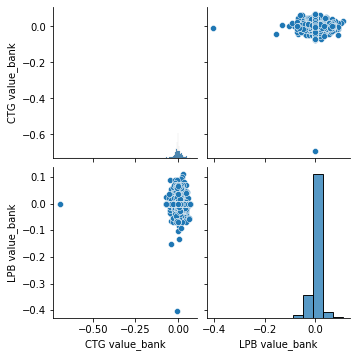

In [ ]:
import seaborn as sns #VE BIEU DO TIM CO PHIEU
sns.pairplot(value_banks)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


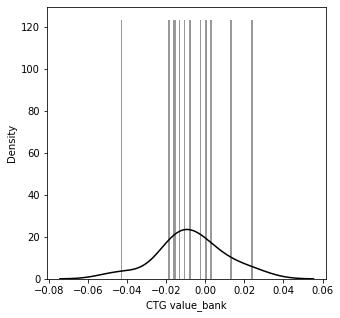

In [ ]:
#biểu đồ phân phối chuẩn lợi nhuận cổ phiếu
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5)) # Tùy chỉnh kích thước biểu đồ
sns.distplot(value_banks.loc['2010-01-01':'2022-10-26']['CTG value_bank'],color='black',bins=100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



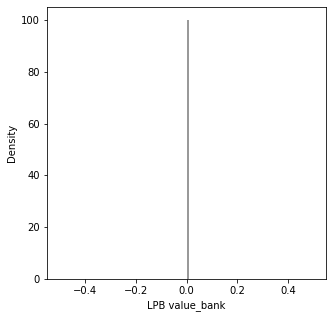

In [ ]:
#biểu đồ phân phối chuẩn lợi nhuận cổ phiếu
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5)) # Tùy chỉnh kích thước biểu đồ
sns.distplot(value_banks.loc['2017-01-01':'2022-10-26']['LPB value_bank'],color='black',bins=100)

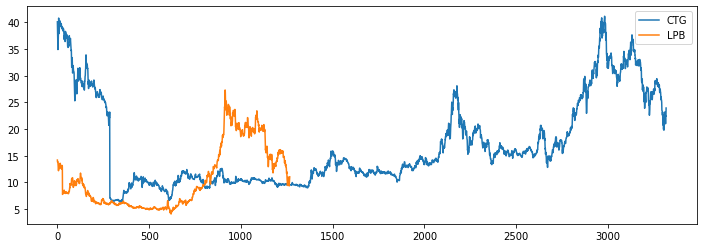

In [ ]:
for tick in list_banks:
    bank_stocks[tick]['<Close>'].plot(figsize=(12,4),label=tick)
plt.legend()

In [ ]:
#Duon MA
plt.figure(figsize=(12,6))
CTG['<Close>'].loc['2010-01-01':'2022-10-26'].rolling(window=30).mean().plot(label='MA30')
CTG['<Close>'].loc['2010-01-01':'2022-10-26'].plot(label='CTG CLOSE')
#LPB['<Close>'].loc['2009-01-01':'2022-01-26'].rolling(window=30).mean().plot(label='MA30')
#LPB['<Close>'].loc['2009-01-01':'2022-01-26'].plot(label='LPB CLOSE')
plt.legend()

NameError: ignored

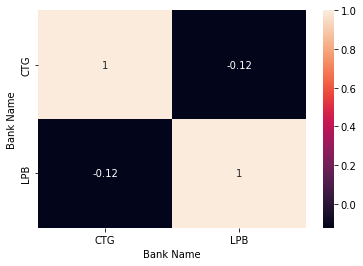

In [ ]:
#Dùng bản đồ nhiệt (Heatmap) 
#plt.figgure(figsize=(12,5))
sns.heatmap(bank_stocks.xs(key='<Close>',axis=1,level='Stock Info').corr(),annot=True)

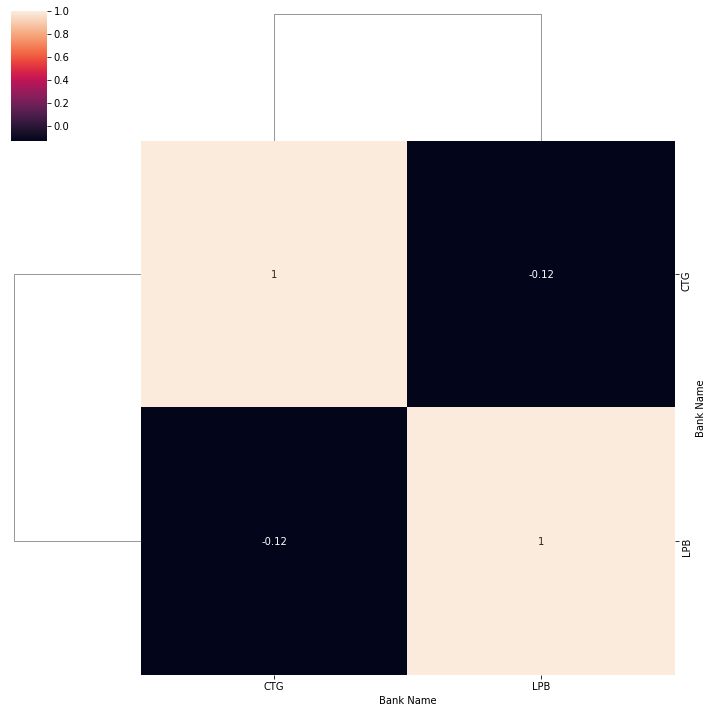

In [ ]:
#nhom co phieu tuon quan
sns.clustermap(bank_stocks.xs(key='<Close>',axis=1,level='Stock Info').corr(),annot=True)

In [ ]:
!pip install cufflinks
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cufflinks as cf
cf.go_offline()
# Để hiển thị trên google colab ta import thêm plotly như bên dưới
import plotly.io as pio 
pio.renderers.default = "colab"

In [ ]:
#price close
bank_stocks.xs(key='<Close>',axis=1,level='Stock Info').iplot(title = "Giá đóng cửa",
xTitle = "Năm", yTitle = "Giá")

In [ ]:
#duon SMA
CTG['<Close>'].loc['2010-01-01':'2022-10-26'].ta_plot(study='sma',periods=[7,14,21],title='SMA CTG')

In [ ]:
CTG['<Close>'].loc['2010-01-01':'2022-10-26'].ta_plot(study='boll')

In [ ]:
CTG[['<Open>', '<High>', '<Low>', '<Close>']].loc['2010-01-01':'2022-10-26'].iplot(kind='candle')

In [ ]:
cf.datagen.ohlc()
CTG_plot = cf.QuantFig(CTG,title = 'Biểu đồ hình nến',legend = "Top", name = "Nến")
CTG_plot.add_bollinger_bands(colors =["red", 'green'])
CTG_plot.iplot()

In [ ]:
CTG_plot.add_sma([10,20],width=2,color=['green','lightgreen'],legendgroup=True)
CTG_plot.add_rsi(periods=20,color='java')
CTG_plot.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
CTG_plot.add_volume()
CTG_plot.add_macd()
CTG_plot.iplot()

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)

In [13]:
pca = PCA(n_components=2)


In [17]:
pca.fit(CTG)PCA(n_components=2)

SyntaxError: ignored